# Proyecto III: Visualización de datos
# Yuniel Antonio Villalón Rosales
## Primera Parte: Análisis de Datos


In [714]:

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

### a.  Vaciar los datos del fichero barca.csv en un dataframe. Debe mostrar los encabezados de los datos y describir la cantidad de alojamientos disponibles.

In [715]:
df = pd.read_csv("data/barca.csv")
print(df.head()) # se muestran solo las primeras 5 filas
print(f"La cantidad total de alojamientos es: {len(df)}")

     room_type    neighborhood  reviews  overall_satisfaction  accommodates  \
0  Shared room        Eixample       27                   4.5            10   
1  Shared room  Sants-Montjuïc       13                   4.0            12   
2  Shared room  Sants-Montjuïc       11                   4.0            12   
3  Shared room        Eixample        9                   5.0             2   
4  Shared room        Eixample       10                   5.0             2   

   bedrooms  price   latitude  longitude  
0       1.0  264.0  41.391617   2.162516  
1       1.0  129.0  41.373268   2.170138  
2       1.0  129.0  41.372360   2.169215  
3       1.0   72.0  41.391836   2.154014  
4       1.0   64.0  41.387623   2.148761  
La cantidad total de alojamientos es: 12633


### b. Mostrar la información del dataset, debe realizar una breve descripción de los datos nombre, tipo de datos y si existen valores nulos, cantidad de atributos numéricos y categóricos (objectos o texto)

In [716]:
info = df.info()
print(info)
print(f"Cantidad de columnas númericas: {len(df.select_dtypes(include=['number']).columns)}") # se cuentan todas las columnas númericas
print(f"Cantidad de columnas de categoria: {len(df.select_dtypes(include=['category']).columns) + len(df.select_dtypes(include=['object']).columns)}") # se cuentan todas las columnas  de texto u objetos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12633 entries, 0 to 12632
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             12633 non-null  object 
 1   neighborhood          12633 non-null  object 
 2   reviews               12633 non-null  int64  
 3   overall_satisfaction  12633 non-null  float64
 4   accommodates          12633 non-null  int64  
 5   bedrooms              12633 non-null  float64
 6   price                 12633 non-null  float64
 7   latitude              12633 non-null  float64
 8   longitude             12633 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 888.4+ KB
None
Cantidad de columnas númericas: 7
Cantidad de columnas de categoria: 2


In [717]:
descrip = df.describe() # se muestran los datos estadisticos
descrip

,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude
count,12633.000000,12633.000000,12633.000000,12633.000000,12633.000000,12633.000000,12633.000000
mean,36.560754,4.560239,3.384707,1.535661,101.214913,41.392161,2.167727
std,43.818590,0.410359,2.220763,0.964957,99.205871,0.014901,0.017873
min,3.000000,1.000000,1.000000,0.000000,10.000000,41.351784,2.088379
25%,8.000000,4.500000,2.000000,1.000000,46.000000,41.380395,2.157068
50%,19.000000,4.500000,2.000000,1.000000,75.000000,41.389284,2.168013
75%,48.000000,5.000000,4.000000,2.000000,122.000000,41.402439,2.178273
max,457.000000,5.000000,16.000000,10.000000,3606.000000,41.465618,2.227329


### c. Mostrar los datos estadísticos del dataset, describa los resultados obtenidos para Price.

In [718]:
descrip["price"]

count    12633.000000
mean       101.214913
std         99.205871
min         10.000000
25%         46.000000
50%         75.000000
75%        122.000000
max       3606.000000
Name: price, dtype: float64

### d. Mostrar la cantidad de alojamientos que existe para cada tipo de alojamiento (room_type) cantidad y porcentaje.

In [719]:
cant = df["room_type"].value_counts() # se guarda la columna "room_type"
c_p = pd.DataFrame(cant) # se transforma en dataframe
c_p["percentage"] = (c_p["room_type"]/len(df)*100).round(2) # se le agrega la columna Porcentaje
c_p.columns.name = "Tipos de alojamiento" # cambia el nombre de la columna
c_p.rename(columns={'room_type':'Cantidad de alojamientos','percentage':'Porcentaje', },inplace=True) # se renombran las columnas
c_p

Tipos de alojamiento,Cantidad de alojamientos,Porcentaje
Private room,6526,51.66
Entire home/apt,6024,47.68
Shared room,83,0.66


### e. Mostrar un gráfico % alojamientos que existe para cada tipo de alojamiento (room_type)

Text(0.5, 1.0, 'Porcentaje por tipos de alojamientos.')

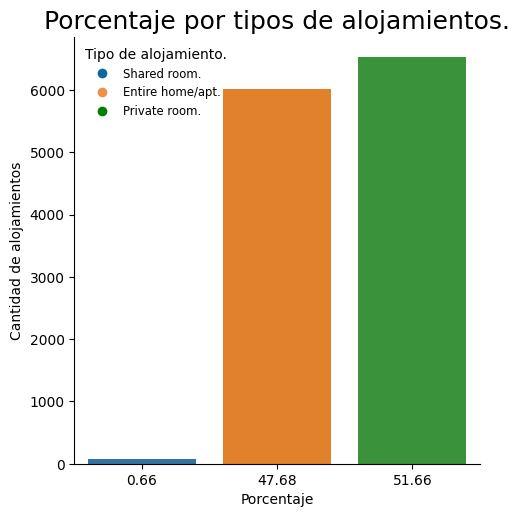

In [720]:
ax = sb.catplot(x = "Porcentaje", y="Cantidad de alojamientos", data=c_p, kind="bar") # grafico de barrras
# Se les da formato a elemento de la leyenda
a = Line2D([], [], marker='o', linestyle='', markersize=6, color='#0a689e',  label='Shared room.')
b = Line2D([], [], marker='o', linestyle='', markersize=6, color='#ed9144', label='Entire home/apt.')
c = Line2D([], [], marker='o', linestyle='', markersize=6, color='green', label='Private room.')
plt.legend(
    handles=[a, b, c],
    title='Tipo de alojamiento.',
    loc='best',
    fontsize='small',
    frameon=False
    )
plt.title("Porcentaje por tipos de alojamientos.", size=18)

### f.  Mostrar un gráfico de dispersión del atributo precio.

[Text(0.5, 0, 'Indice'), Text(0, 0.5, 'Precio')]

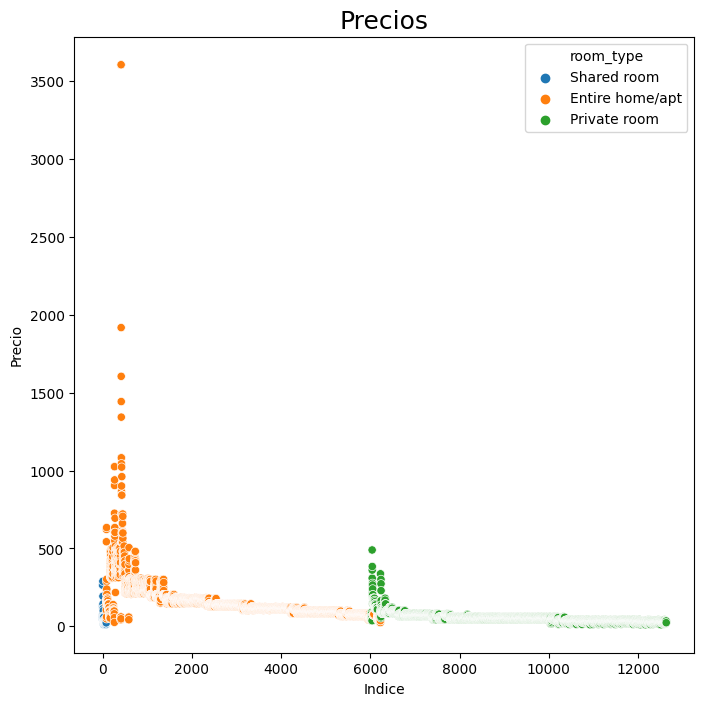

In [721]:
ax =sb.scatterplot(data=df, x=df.index, y="price", hue="room_type") # Grafico de dispersion del precio
plt.title("Precios", size=18)
ax.set (xlabel = 'Indice',
        ylabel = 'Precio')

### g.  Mostrar un gráfico de caja (boxplot) para precio, habilite la opción para visualizar los datos atípicos. 

Text(0.5, 1.0, 'Gráfico de caja (boxplot) para precio')

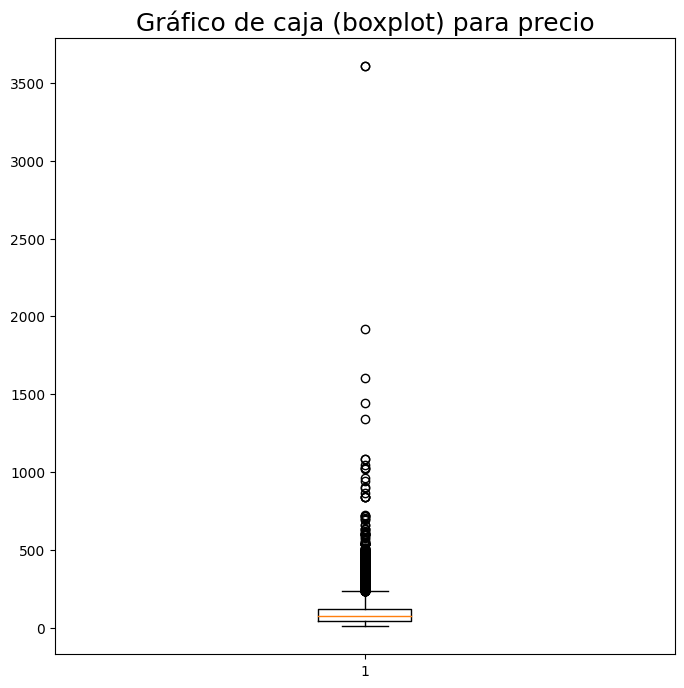

In [722]:
plt.boxplot(df['price'], vert=True, showfliers=True) # gráfico de caja del precio
plt.title("Gráfico de caja (boxplot) para precio", size=18)

### h.  Mostrar la cantidad de alojamientos por barrio "neighborhood"

In [723]:
cant_neighborhood = df["neighborhood"].value_counts() # se selecciona la columna y se cuentan
neighborhood = pd.DataFrame(cant_neighborhood) # se transforma la serie en una dataframe
neighborhood.columns.name = "Barrios de barcelona"
neighborhood.rename(columns={'neighborhood':'Cantidad de alojamientos'},inplace=True)
neighborhood

Barrios de barcelona,Cantidad de alojamientos
Eixample,4288
Ciutat Vella,2723
Sants-Montjuïc,1507
Sant Martí,1473
Gràcia,1191
Sarrià-Sant Gervasi,435
Horta-Guinardó,416
Les Corts,238
Sant Andreu,205
Nou Barris,157


### i.  Mostrar un gráfico que muestre los tipos de alojamiento (room_type) por barrio "neighborhood"

Text(0.5, 1.0, 'Tipos de alojamiento por barrio')

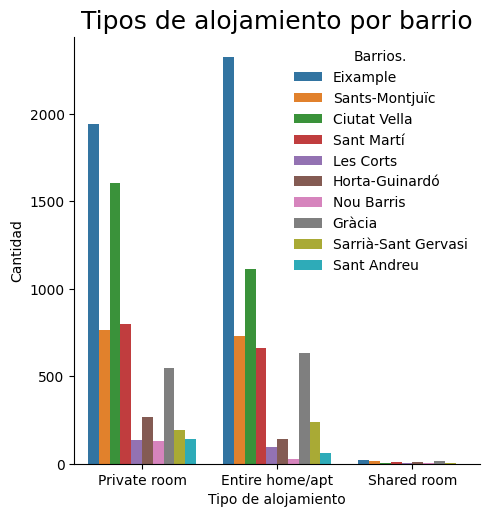

In [724]:
# Grafico que muestra la cantidad de alojamientos de cada tipo y la distibución por Barrio
ax = sb.catplot(x="room_type",data=df,hue="neighborhood",kind='count', order = df['room_type'].value_counts().index, legend =False)
# Se cambia el formato de la representación de la leyenda
plt.legend(
        title='Barrios.',
        loc='best',
        fontsize='medium',
        frameon=False
        )
ax.set (xlabel = 'Tipo de alojamiento',
        ylabel = 'Cantidad')
plt.title("Tipos de alojamiento por barrio", size=18)

### j.  Mostrar los histogramas de los datos numéricos del dataset

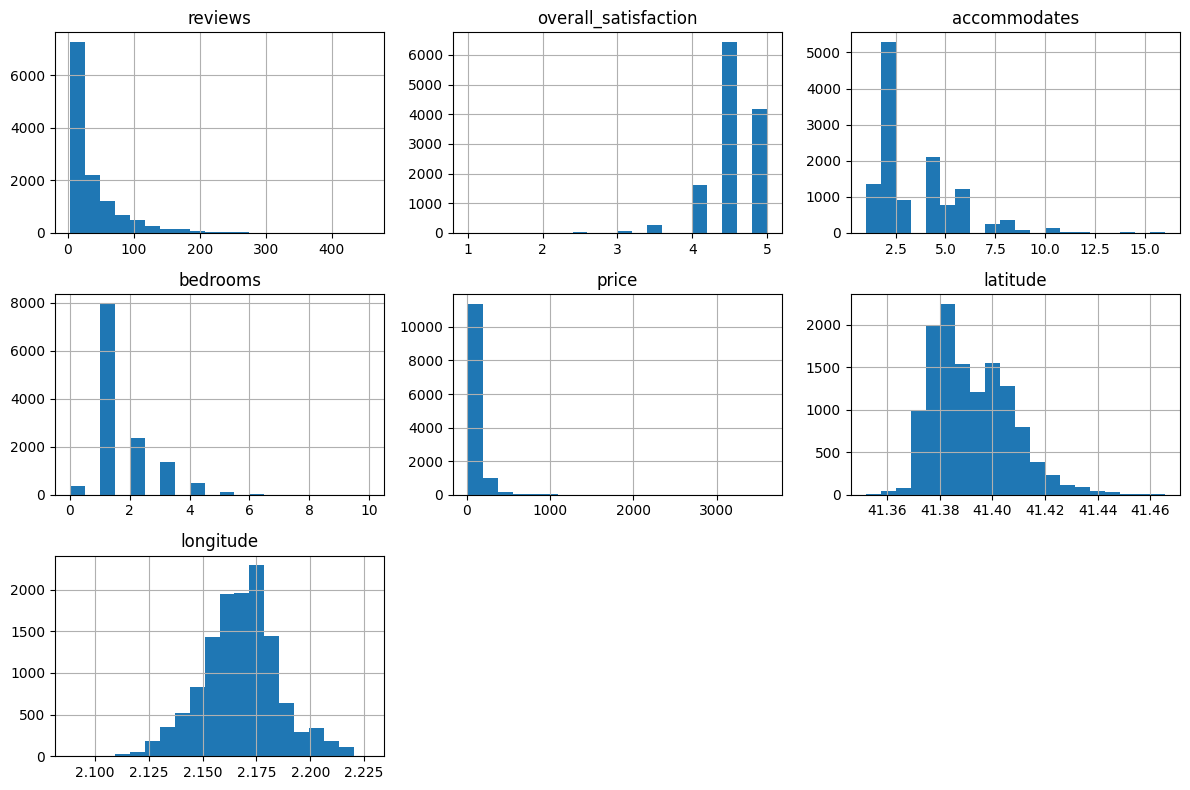

In [725]:
(df.select_dtypes(include=['number'])).hist(figsize=(12, 8), bins=20) # se seleccion las columnas numericas y se crea un histograma por cada una de ellas
plt.tight_layout()
plt.show()

### k.  Mostrar una matriz de correlación de los datos numéricos

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'reviews'),
  Text(1.5, 0, 'overall_satisfaction'),
  Text(2.5, 0, 'accommodates'),
  Text(3.5, 0, 'bedrooms'),
  Text(4.5, 0, 'price'),
  Text(5.5, 0, 'latitude'),
  Text(6.5, 0, 'longitude')])

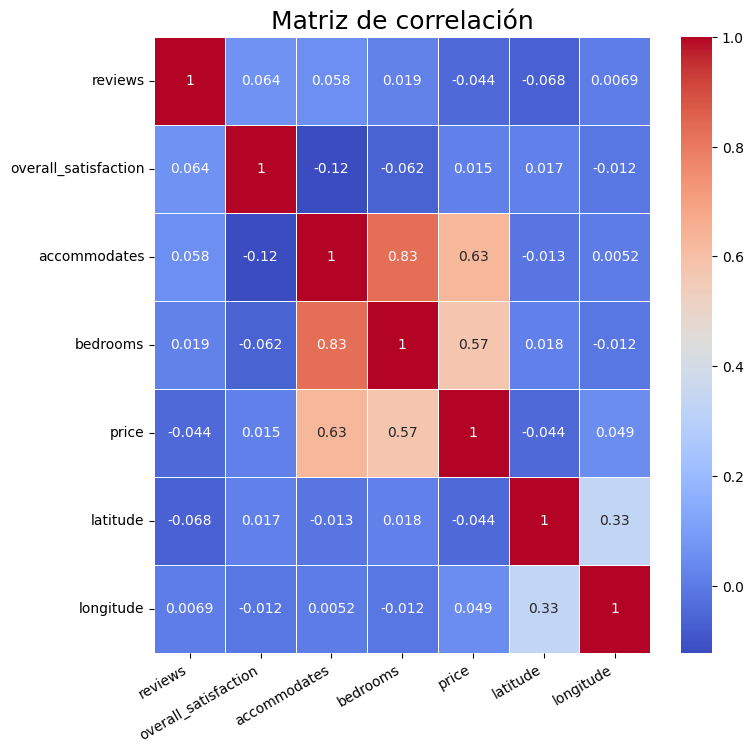

In [726]:
matriz_correlacion = (df.select_dtypes(include=['number'])).corr() # se calcula la matrix de correlación
sb.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', linewidths=0.5) # creacion de mapa de calor
plt.title("Matriz de correlación", size=18)
plt.xticks(rotation=30, ha='right') # se mueven los nombre de los ejes de las x 30 grados

### l.  Mostrar un gráfico 3D que muestre la ubicación (latitud, longitud) de los tres tipos de alojamientos

Text(0.5, 0.92, 'Ubicación de los tipos de alojamientos')

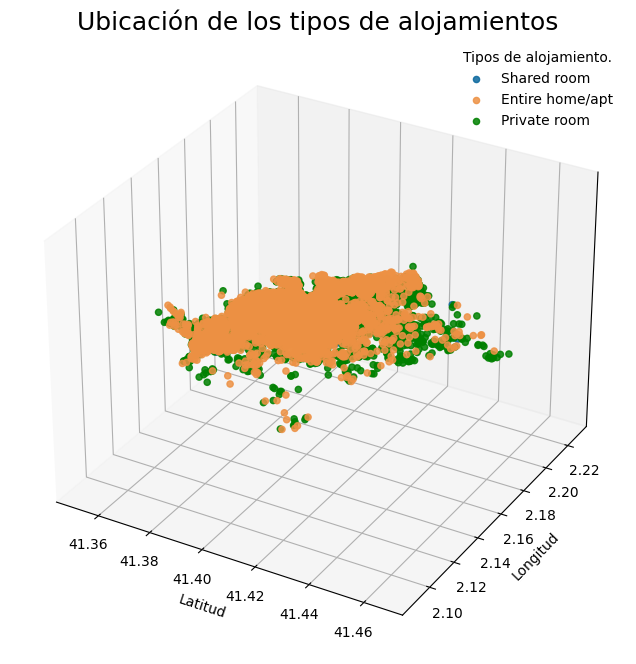

In [727]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d') # creo el espacio para "dibujar el gráfico"

shared_room ='#0a689e'
entire_home_apt ='#ed9144'
private_room ='green'

tipo_alojamientos = df['room_type'].unique() # selecciono los tipos de alojammieto
colores = [shared_room, entire_home_apt, private_room] # guardo los colores por tipo de alojamiento

for room_type, color in zip(tipo_alojamientos, colores): # ciclo for para asignar colores y crear gráfico por tipo
        data = df[df['room_type'] == room_type]
        ax.scatter3D(data['latitude'], data['longitude'], zs=0, zdir='z', s=20, c=color, label=room_type, alpha=0.85)

plt.legend(
        title='Tipos de alojamiento.',
        loc='best',
        fontsize='medium',
        frameon=False
        )

ax.set (xlabel = 'Latitud',
        ylabel = 'Longitud',
        zticks = []
        )
plt.title("Ubicación de los tipos de alojamientos", size=18)

### m.  Mostrar un grafico que muestre la ubicación de los alojamientos (latitud, longitud), utilice una columna de color (colobar) para representar los precios de los alojamientos.

Text(0.5, 1.0, 'Ubicación de los tipos de alojamientos')

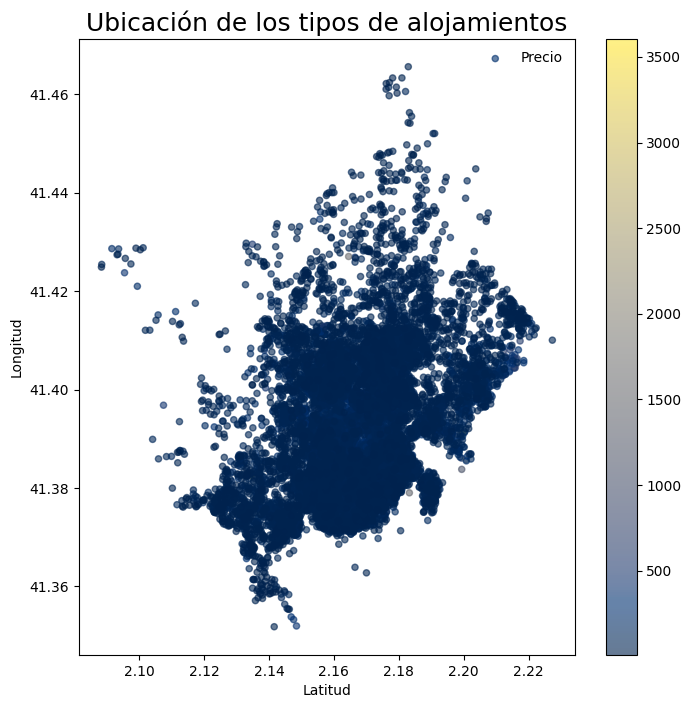

In [728]:
ax = df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.6, # Se crea gráfico de dispersión
        s=20, label="Precio", c=df["price"], cmap=plt.get_cmap("cividis"), colorbar=True)

plt.legend( # se establece la mejor posicion y el formato de la etiqueta
        loc='best',
        fontsize='medium',
        frameon=False
        )

ax.set (xlabel = 'Latitud',
        ylabel = 'Longitud',
        )
plt.title("Ubicación de los tipos de alojamientos", size=18) # se le da nombre al gráfico

## Segunda Parte: Análisis de Datos 

### a.  Mostrar la cantidad y la media de películas producidas por año x plataforma. Crear un gráfico que muestre los resultados por plataforma.

,Year,Netflix,Hulu,Prime Video,Disney+
108,2020,104,6,31,9
107,2019,428,104,172,23
106,2018,560,158,625,16
105,2017,569,124,763,22
104,2016,444,62,730,17
...,...,...,...,...,...
4,1916,0,0,1,0
3,1915,0,0,4,0
2,1913,0,0,2,0
1,1912,0,0,1,0


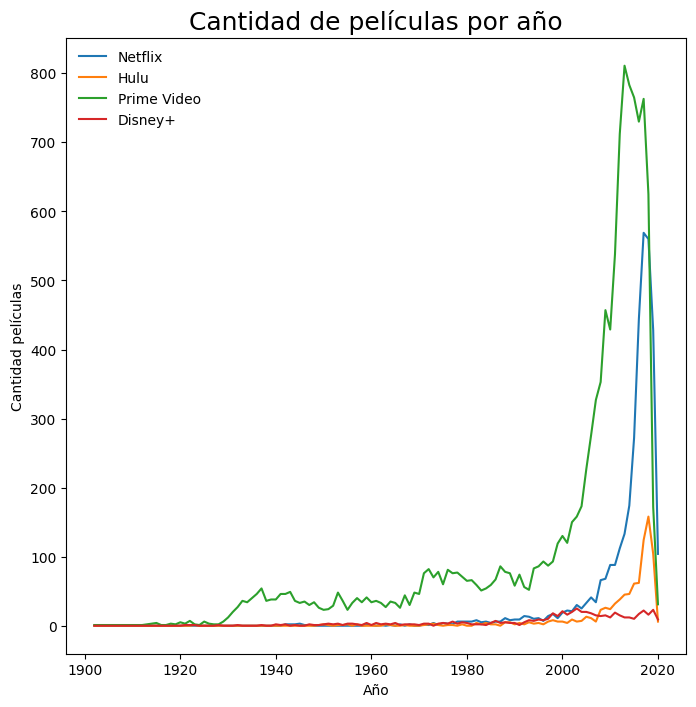

In [729]:
df = pd.read_csv("data/MoviesOnStreamingPlatforms_updated.csv") # se guarda en la variable el contenido del arichivo
streaming = ['Netflix', 'Hulu', 'Prime Video', 'Disney+'] # Se crea un lista de cotejamiento con las plataformas streaming que estan
cant_x_y = df.groupby('Year')[streaming].sum().reset_index() # Se agrupa por año y se desglosa la cantidad de pelis por las diferentes plataforma
c_y = pd.DataFrame(cant_x_y) # Se tranforma de serie a dataframe
ax = plt.plot(cant_x_y['Year'], cant_x_y[streaming]) # creacion del gráfico

plt.legend(streaming, # se le pasan los valores de la leyenda, asi como ubicación
        loc='best',
        fontsize='medium',
        frameon=False
        )
# se renombras las etiquetas de ambos ejes y se le da nombre al gráfico
plt.xlabel('Año')
plt.ylabel('Cantidad películas')
plt.title("Cantidad de películas por año", size=18)

c_y.sort_values(by='Year', ascending=False)


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Netflix'),
  Text(1, 0, 'Hulu'),
  Text(2, 0, 'Prime Video'),
  Text(3, 0, 'Disney+')])

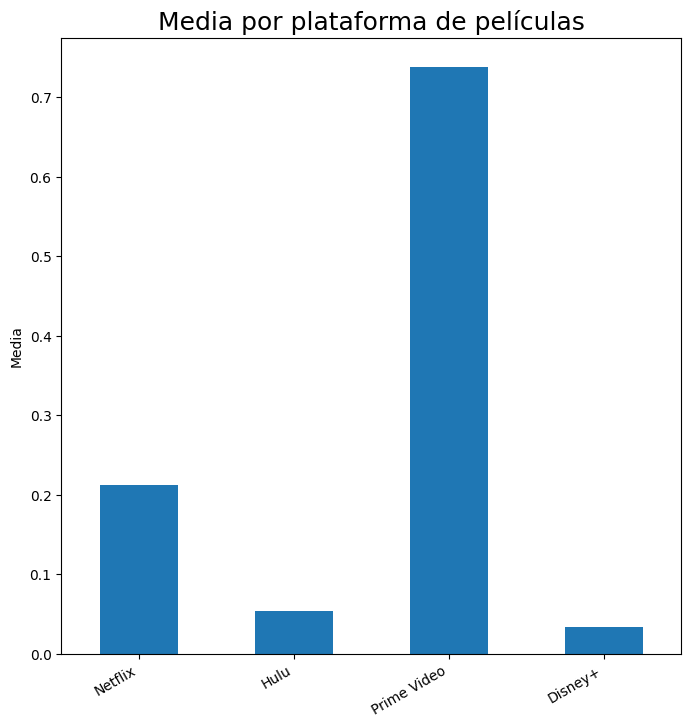

In [739]:
media_streaming = df[streaming].mean() # se calcula la media
media_streaming.plot(kind='bar') # se crea el gráfico
# Se renombras ambos ejes asi como se le da nombre al gráfico
plt.ylabel('Media')
plt.title("Media por plataforma de películas", size=18)
plt.xticks(rotation=30, ha='right')

### b.  Mostrar y crear un gráfico de las películas recomendadas por edad x plataforma

,Age,Netflix,Hulu,Prime Video,Disney+
0,13+,383,119,819,40
1,16+,89,17,226,1
2,18+,752,290,2612,3
3,7+,323,109,916,179
4,all,130,55,406,277


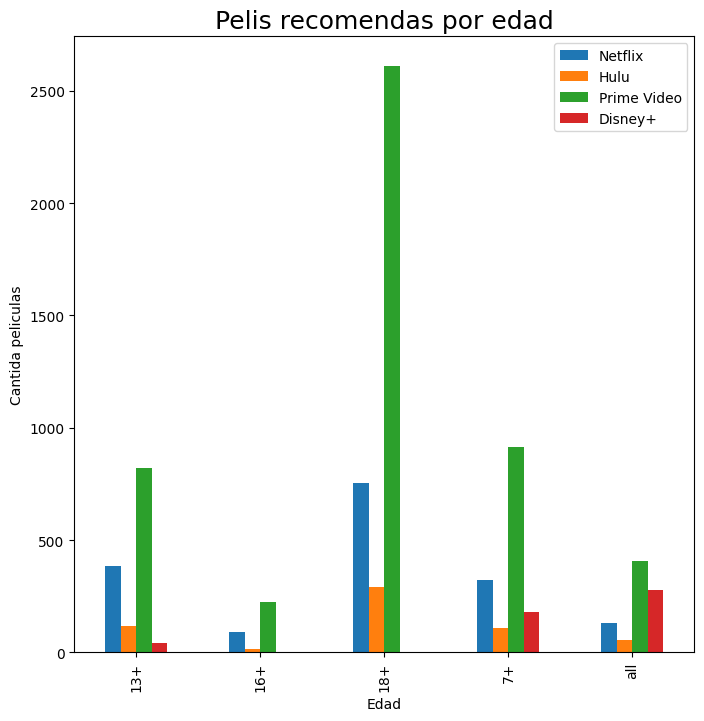

In [742]:
cont_edad_streaming = df.groupby(['Age'])[streaming].sum().reset_index() # Se agrupa por edad y se desglosa la cantidad de pelis por las diferentes franjas de edad
cont_edad_streaming.plot(x='Age', y=streaming, kind='bar')
plt.xlabel('Edad')
plt.ylabel('Cantida peliculas')
plt.title("Pelis recomendas por edad", size=18)

cont_edad_streaming

### c.  Mostrar las cinco películas con mejor valoración (rating) en general y por plataforma

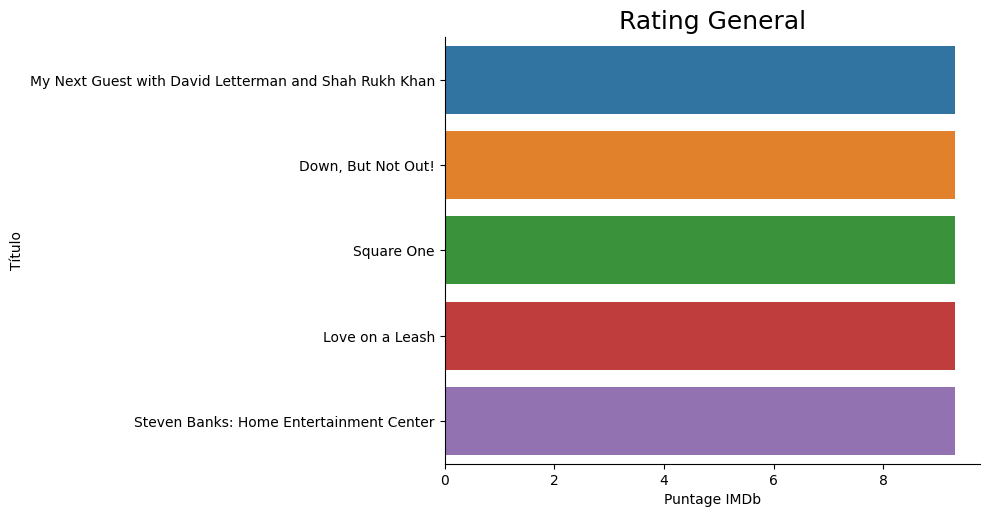

In [772]:
rating = df.sort_values(by='IMDb', ascending=False,) # Se ordena de mayor a menor por el rating de IMDb
top_five = rating[['Title', 'IMDb']].head() # Se seleccionan solo las 5 primeras
ax = sb.catplot(x = "IMDb", y="Title", data=top_five, kind="bar", aspect=2) # Crea gráfico del top 5 general
plt.title("Rating General", size=18)
ax.set (xlabel = 'Puntage IMDb',
        ylabel = 'Título')

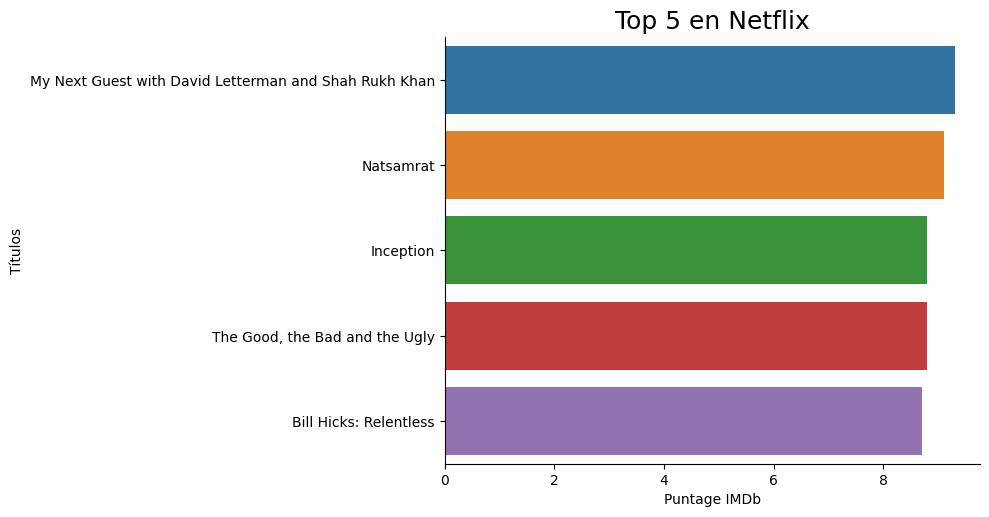

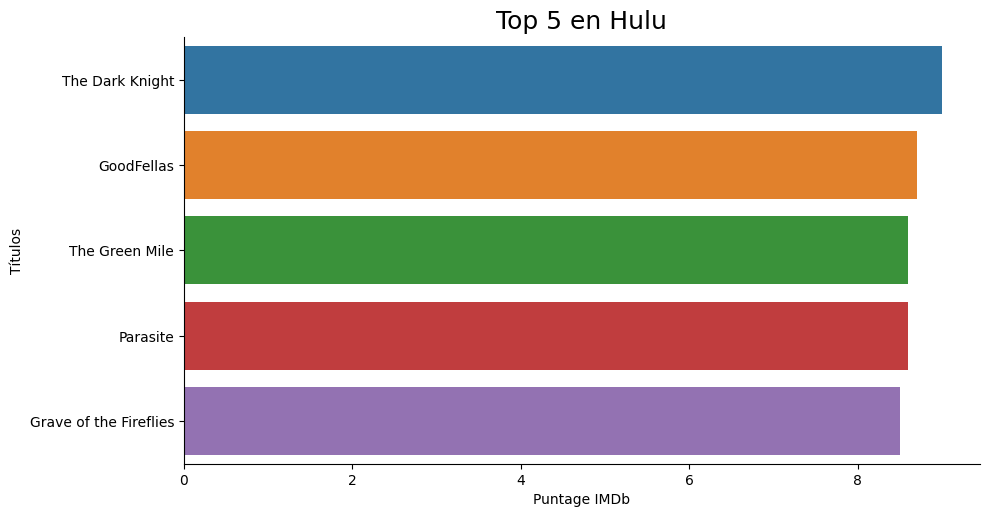

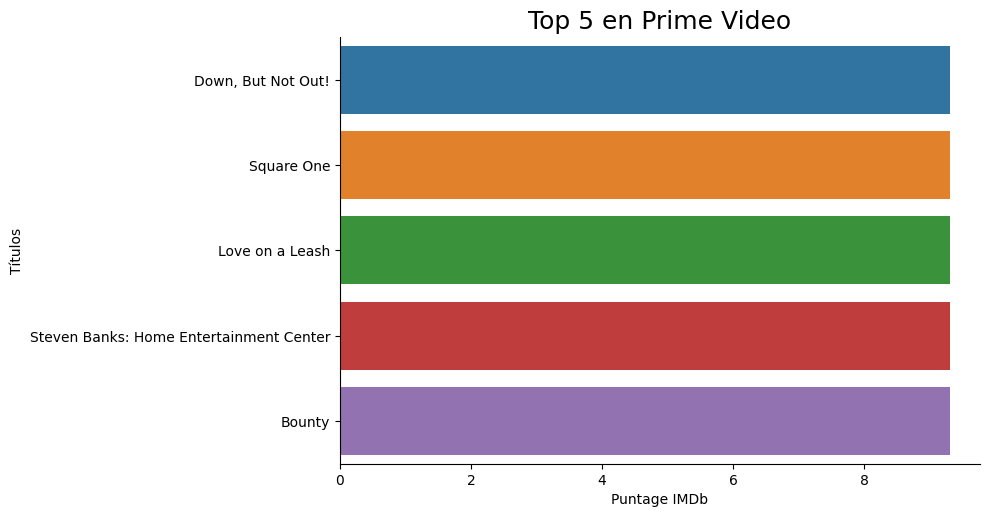

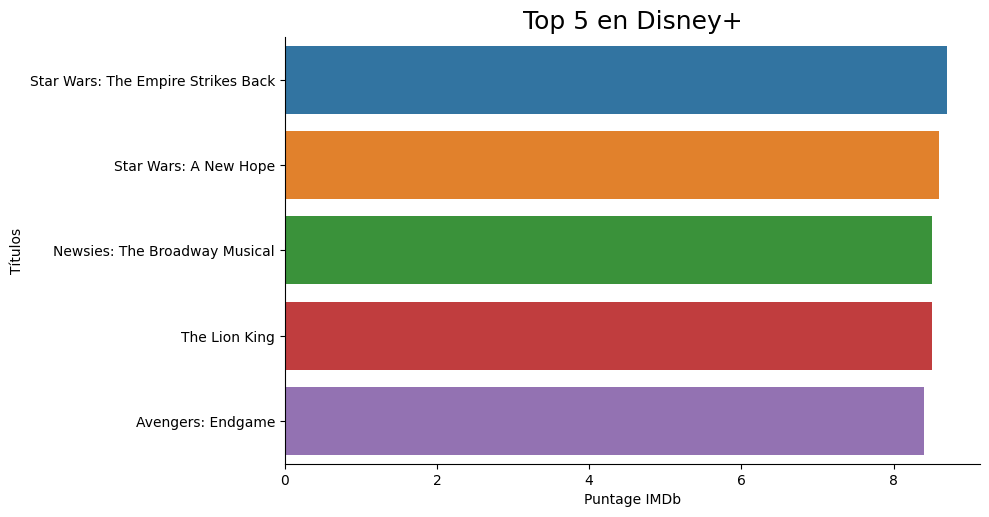

In [790]:
for i, plataforma in enumerate(streaming):
    platform_movies = rating[rating[plataforma] == 1]
    top_movies = platform_movies[['Title', 'IMDb']].head(5)
    ax = sb.catplot(x = "IMDb", y="Title", data=top_movies, kind="bar", aspect=2) # Crea gráfico del top 5 por cada plataforma
    ax.set (xlabel = 'Puntage IMDb',
            ylabel = 'Títulos')
    plt.title(f"Top 5 en {plataforma}", size=18)

### d.  Mostrar y crear un gráfico que muestre la cantidad de películas disponibles por plataforma 